<a href="https://colab.research.google.com/github/SELOMELO280104/Aware-G-revler/blob/main/polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polygon Test

In [8]:
# Gerekli kütüphaneleri kur
!pip install ultralytics -q
import os
import zipfile
from google.colab import files
from ultralytics import YOLO

# 1. Zip dosyasını yükleme ekranı
print("👇 Lütfen Roboflow'dan indirdiğiniz POLYGON (Segmentation) '.zip' veri setini seçin:")
uploaded = files.upload()

if uploaded:
    zip_filename = list(uploaded.keys())[0]
    extract_dir = '/content/dataset_seg' # Klasör adını seg olarak güncelledik

    # 2. Zip dosyasını çıkartma
    print(f"\n📦 '{zip_filename}' çıkartılıyor...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # 3. data.yaml dosyasını otomatik bulma
    yaml_path = None
    for root, dirs, dosyalar in os.walk(extract_dir):
        if 'data.yaml' in dosyalar:
            yaml_path = os.path.join(root, 'data.yaml')
            break

    if yaml_path:
        print(f"✅ Polygon veri seti hazır! Dosya yolu: {yaml_path}")

        # 4. Eğitimi Başlatma (SEGMENTASYON İÇİN -seg takısı şart)
        print("\n🚀 Polygon (Segmentasyon) eğitimi T4 GPU üzerinde başlıyor...")

        # KRİTİK DEĞİŞİKLİK: yolov8n-seg.pt kullanıyoruz
        model = YOLO('yolov8n-seg.pt')

        results = model.train(
            data=yaml_path,
            epochs=30,
            imgsz=640,
            batch=16,
            project='/content/Trained_model_seg', # Proje klasör adını ayırdık
            name='ayakkabi_polygon_sonuc'
        )
        print("\n🎉 Polygon eğitimi başarıyla tamamlandı!")
    else:
        print("❌ HATA: Zip dosyasının içinde 'data.yaml' bulunamadı!")
else:
    print("❌ Dosya yüklemesi iptal edildi.")

👇 Lütfen Roboflow'dan indirdiğiniz POLYGON (Segmentation) '.zip' veri setini seçin:


Saving My First Project.v1i.yolov8.zip to My First Project.v1i.yolov8 (1).zip

📦 'My First Project.v1i.yolov8 (1).zip' çıkartılıyor...
✅ Polygon veri seti hazır! Dosya yolu: /content/dataset_seg/data.yaml

🚀 Polygon (Segmentasyon) eğitimi T4 GPU üzerinde başlıyor...
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_seg/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, l

🔍 Polygon (Segmentasyon) test verileriyle performans ölçülüyor...
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLOv8n-seg summary (fused): 86 layers, 3,258,259 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 620.4±199.2 MB/s, size: 19.6 KB)
val: Scanning /content/dataset_seg/test/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.5it/s 0.2s
                   all          4          4      0.964          1      0.995      0.995      0.964          1      0.995      0.995
Speed: 2.6ms preprocess, 9.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/Trained_model_seg/test_sonuclari_seg5

📷 Test Klasöründen Örnek Polygon Tespiti:


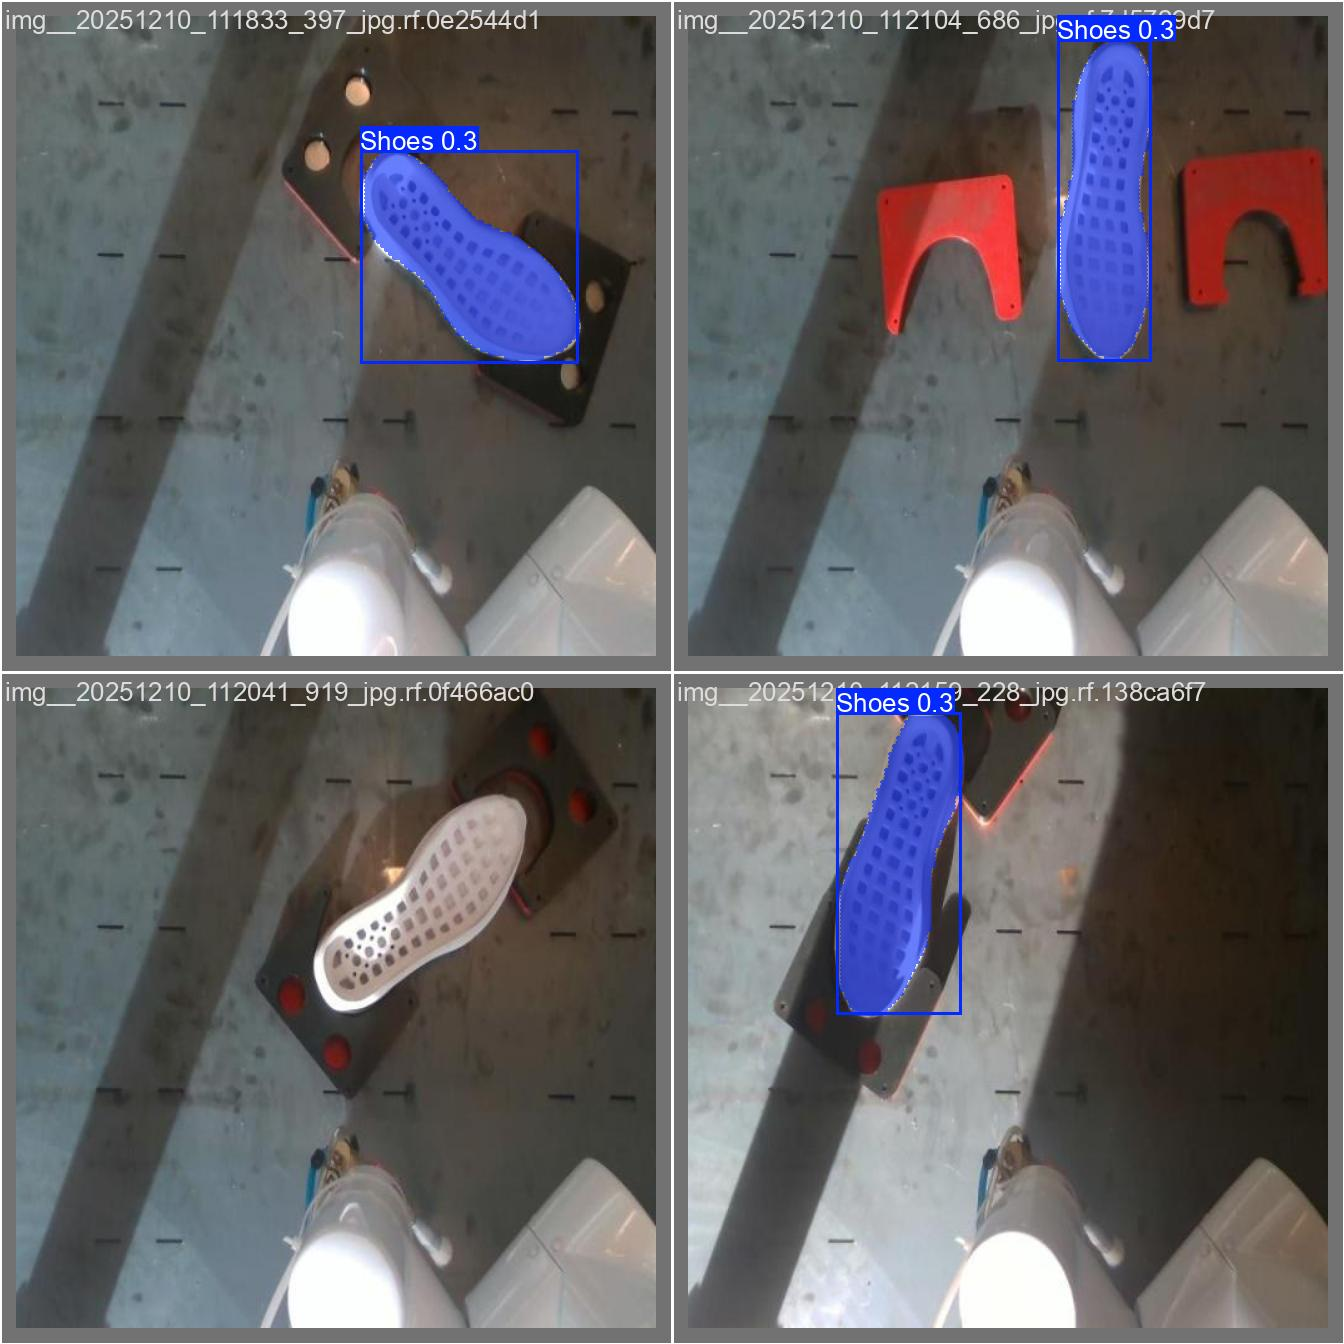

In [9]:
from IPython.display import Image, display
import glob
from ultralytics import YOLO

print("🔍 Polygon (Segmentasyon) test verileriyle performans ölçülüyor...")

# 1. Model yolunu kontrol et (Sol menüden doğrula)
best_model_path = '/content/Trained_model_seg/ayakkabi_polygon_sonuc/weights/best.pt'
model = YOLO(best_model_path)

# 2. Doğrulama yaparken conf parametresini ekliyoruz
# conf=0.25 yaparsan sadece %25 ve üzeri emin olduğu maskeleri çizer
metrics = model.val(
    split='test',
    project='/content/Trained_model_seg',
    name='test_sonuclari_seg',
    conf=0.01,  # <--- BURADAN DÜŞÜREBİLİR VEYA YÜKSELTEBİLİRSİN
    iou=0.45    # Kesişim eşiği (opsiyonel)
)

# 3. Sonuçları göster
print("\n📷 Test Klasöründen Örnek Polygon Tespiti:")
resimler = glob.glob('/content/Trained_model_seg/test_sonuclari_seg*/val_batch0_pred.jpg')

if resimler:
    display(Image(filename=resimler[0]))
else:
    print("Örnek görsel bulunamadı.")

In [11]:
from google.colab import files
import os

# Polygon projesi için doğru yol budur (Klasör ismini sol menüden teyit et)
# Eğer klasörün adı 'train' ise 'ayakkabi_polygon_sonuc' yerine 'train' yazmalısın.
best_model_path = '/content/Trained_model_seg/ayakkabi_polygon_sonuc/weights/best.pt'

if os.path.exists(best_model_path):
    print("⬇️ Eğitilmiş Polygon modeli (best.pt) indiriliyor...")
    files.download(best_model_path)
    print("✅ İndirme başlatıldı!")
else:
    print(f"❌ HATA: Dosya bulunamadı! Lütfen yolu kontrol et: {best_model_path}")
    print("💡 İpucu: Sol menüden 'weights' klasörüne git, best.pt dosyasına sağ tıkla ve 'Yolu kopyala' de.")

⬇️ Eğitilmiş Polygon modeli (best.pt) indiriliyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ İndirme başlatıldı!
